In [2]:
import pandas as pd
import datetime
import os
import re
import flair
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from textblob import TextBlob

In [3]:
cd = os.getcwd()
processed_data_directory_path = "/".join(cd.split("/")[:-1]) + "/data/processed/"

In [4]:
full_tweet_df = pd.read_csv(processed_data_directory_path + "processed_stock_tweet_data.csv")
full_tweet_df = full_tweet_df.drop(columns=["Unnamed: 0"])

# Sentiment Classification - Flair

In [5]:
sentiment_model = flair.models.TextClassifier.load('en-sentiment')

2021-07-24 17:21:46,196 loading file /Users/sumedhshah1994/.flair/models/sentiment-en-mix-distillbert_4.pt


In [6]:
def clean_tweet(tweet):
    whitespace = re.compile(r"\s+")
    web_address = re.compile(r"(?i)http(s):\/\/[a-z0-9.~_\-\/]+")
    user = re.compile(r"(?i)@[a-z0-9_]+")

    # we then use the sub method to replace anything matching
    tweet = whitespace.sub(' ', tweet)
    tweet = web_address.sub('', tweet)
    tweet = user.sub('', tweet)
    
    return tweet


def predict_sentiment(input_tweet):
    sentence = flair.data.Sentence(input_tweet)
    sentiment_model.predict(sentence)
    return sentence.labels[0]

def get_sentiment_score(input_tweet):
    sentence = flair.data.Sentence(input_tweet)
    sentiment_model.predict(sentence)
    if sentence.labels[0].value=='NEGATIVE':
        return sentence.labels[0].score*-1
    else:
        return sentence.labels[0].score

def change_sentiment_score(input_tweet):
    if input_tweet['sentiment'].value=='NEGATIVE':
        input_tweet['sentiment_score'] = input_tweet['sentiment_score']*-1
    return input_tweet



In [7]:
test_df = full_tweet_df[:1000]

test_df["clean_tweet"] = test_df["body"].apply(clean_tweet)

#test_df["sentiment"] = test_df["clean_tweet"].apply(predict_sentiment)

test_df["sentiment_score"] = test_df["clean_tweet"].apply(get_sentiment_score)

# predict sentiment of tweet
#test_df = test_df.apply(change_sentiment_score,axis=1)

/Users/sumedhshah1994/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [8]:
test_df

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,company_name,clean_tweet,sentiment_score
0,550803612197457920,AAPL,SentiQuant,2015-01-01 17:59:49,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,apple,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0.961183
1,550803610825928706,AAPL,SentiQuant,2015-01-01 17:59:48,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,apple,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,-0.903258
2,550803225113157632,AAPL,MacHashNews,2015-01-01 17:58:16,Rumor Roundup: What to expect when you're expe...,0,0,0,apple,Rumor Roundup: What to expect when you're expe...,-0.977271
3,550802957370159104,AAPL,WaltLightShed,2015-01-01 17:57:13,"An $AAPL store line in Sapporo Japan for the ""...",2,4,4,apple,"An $AAPL store line in Sapporo Japan for the ""...",-0.524009
4,550802855129382912,AAPL,2waystrading,2015-01-01 17:56:48,$AAPL - Will $AAPL Give Second entry opportuni...,0,0,0,apple,$AAPL - Will $AAPL Give Second entry opportuni...,-0.993722
...,...,...,...,...,...,...,...,...,...,...,...
995,551011923891060737,AAPL,DonCollieony,2015-01-02 07:47:34,Di satan tse “@russian_market: Apple sued for...,0,0,0,apple,Di satan tse “: Apple sued for 'deceiving' peo...,-0.999199
996,551011719481655298,AAPL,zientekglobal,2015-01-02 07:46:45,“@AmericanBanking: #Apple Price Target Increas...,0,0,0,apple,“: #Apple Price Target Increased to $125.00 by...,-0.997763
997,551011539449569280,AAPL,JohnMelloy,2015-01-02 07:46:02,Argus latest of many to downplay Apple $AAPL w...,0,0,1,apple,Argus latest of many to downplay Apple $AAPL w...,-0.998350
998,551011315763150848,AAPL,garynielson,2015-01-02 07:45:09,Apple sued over 'shrinking' gadget storage und...,0,0,0,apple,Apple sued over 'shrinking' gadget storage und...,-0.999497


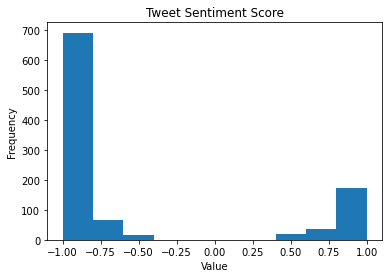

In [9]:
# View tweet polarity
plt.hist(test_df['sentiment_score'])
#plt.xticks(range(-1,2))
plt.title('Tweet Sentiment Score')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Sentiment Classification - TextBlob

In [11]:
def predict_textblob_sentiment(input_tweet):
    input_tweet['polarity'] = TextBlob(input_tweet["clean_tweet"]).sentiment.polarity
    input_tweet['subjectivity'] =  TextBlob(input_tweet["clean_tweet"]).sentiment.subjectivity
    return input_tweet


# Get first 1000 rows
test_tb_df = full_tweet_df[:1000]

# Apply clean tweet code to tweet body
test_tb_df["clean_tweet"] = test_tb_df["body"].apply(clean_tweet)

# predict sentiment of tweet
test_tb_df = test_tb_df.apply(predict_textblob_sentiment,axis=1)

/Users/sumedhshah1994/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [12]:
test_tb_df

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,company_name,clean_tweet,polarity,subjectivity
0,550803612197457920,AAPL,SentiQuant,2015-01-01 17:59:49,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,apple,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0.000000,0.000000
1,550803610825928706,AAPL,SentiQuant,2015-01-01 17:59:48,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,apple,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0.000000,0.000000
2,550803225113157632,AAPL,MacHashNews,2015-01-01 17:58:16,Rumor Roundup: What to expect when you're expe...,0,0,0,apple,Rumor Roundup: What to expect when you're expe...,0.000000,0.000000
3,550802957370159104,AAPL,WaltLightShed,2015-01-01 17:57:13,"An $AAPL store line in Sapporo Japan for the ""...",2,4,4,apple,"An $AAPL store line in Sapporo Japan for the ""...",0.333333,0.833333
4,550802855129382912,AAPL,2waystrading,2015-01-01 17:56:48,$AAPL - Will $AAPL Give Second entry opportuni...,0,0,0,apple,$AAPL - Will $AAPL Give Second entry opportuni...,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
995,551011923891060737,AAPL,DonCollieony,2015-01-02 07:47:34,Di satan tse “@russian_market: Apple sued for...,0,0,0,apple,Di satan tse “: Apple sued for 'deceiving' peo...,0.000000,0.000000
996,551011719481655298,AAPL,zientekglobal,2015-01-02 07:46:45,“@AmericanBanking: #Apple Price Target Increas...,0,0,0,apple,“: #Apple Price Target Increased to $125.00 by...,0.000000,0.000000
997,551011539449569280,AAPL,JohnMelloy,2015-01-02 07:46:02,Argus latest of many to downplay Apple $AAPL w...,0,0,1,apple,Argus latest of many to downplay Apple $AAPL w...,0.500000,0.700000
998,551011315763150848,AAPL,garynielson,2015-01-02 07:45:09,Apple sued over 'shrinking' gadget storage und...,0,0,0,apple,Apple sued over 'shrinking' gadget storage und...,0.000000,0.000000


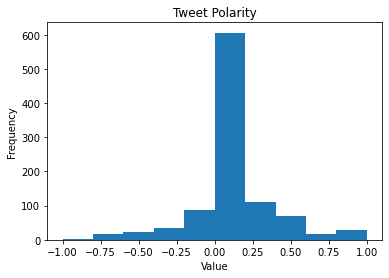

In [13]:
# View tweet polarity
plt.hist(test_tb_df['polarity'])
#plt.xticks(range(-1,2))
plt.title('Tweet Polarity')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


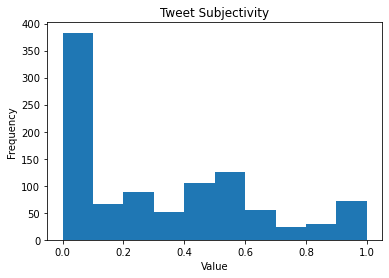

In [14]:
# View tweet subjectivity
plt.hist(test_tb_df['subjectivity'])
plt.title('Tweet Subjectivity')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Sentiment Classification - Vader

In [15]:
main_df = pd.read_csv(processed_data_directory_path+'main_df.csv')
main_df = main_df.drop(columns=["Unnamed: 0"])
main_df = main_df.drop(columns=["Unnamed: 0.1"])

In [16]:
main_df.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,company_name,day_date,...,open_value,high_value,low_value,return,sent_scores,compound,tweet_sent,positive,negative,reaction_num
0,550517928399888384,jrs101780,2015-01-01,@davenathan I just expected something more ext...,1,0,0,AAPL,apple,2015-01-01,...,112.82,113.13,110.21,NaN,"{'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'comp...",0.7769,pos,1,0,1
1,550518033622368256,bobcatturner,2015-01-01,"Week's Winners and Losers: Apple Gels, Marriot...",0,0,0,AAPL,apple,2015-01-01,...,112.82,113.13,110.21,NaN,"{'neg': 0.184, 'neu': 0.649, 'pos': 0.168, 'co...",-0.0772,neg,0,1,0
2,550520264228737024,MilesGeauxbye,2015-01-01,GOOD LUCK“@WSJ: Apple is being sued for falsel...,0,0,0,AAPL,apple,2015-01-01,...,112.82,113.13,110.21,NaN,"{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'comp...",0.5622,pos,1,0,0
3,550521659044552706,bullandbearmash,2015-01-01,"Commented on: ""2015 Will Be Apple's Year: Rais...",0,0,0,AAPL,apple,2015-01-01,...,112.82,113.13,110.21,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,1,0,0
4,550523990243295232,TCBFx,2015-01-01,The Closing Bell is out! http://paper.li/BonaC...,0,0,1,AAPL,apple,2015-01-01,...,112.82,113.13,110.21,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,1,0,1


In [17]:
test_vader_df = main_df[main_df.tweet_id.isin(list(test_tb_df['tweet_id']))]

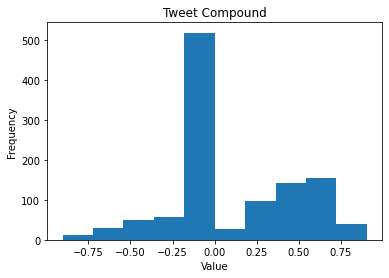

In [18]:
# View tweet compound
plt.hist(test_vader_df['compound'])
#plt.xticks(range(-1,2))
plt.title('Tweet Compound')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Compare All Three Sentiment Analyzers

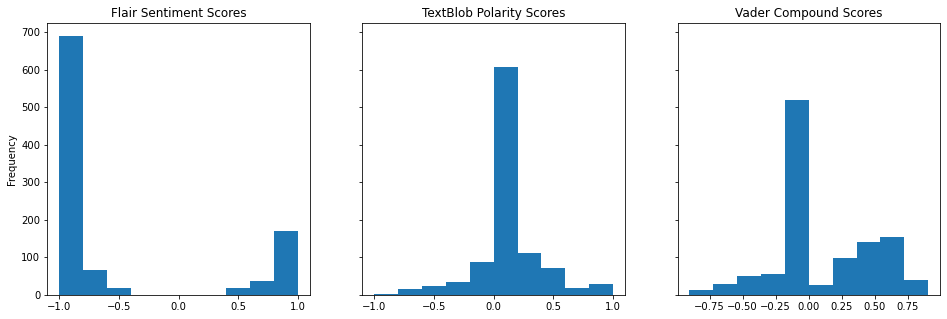

In [39]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(16,5))
ax1.hist(test_df['sentiment_score'])
ax1.set_title('Flair Sentiment Scores')
ax1.set_ylabel('Frequency')

ax2.hist(test_tb_df['polarity'])
ax2.set_title('TextBlob Polarity Scores')

ax3.hist(test_vader_df['compound'])
ax3.set_title('Vader Compound Scores')
plt.show()

In [20]:
# Show negative, neutral, and positive values
print('Flair Values:')
print('Number of Negative Sentiment Values:',test_df.loc[test_df.sentiment_score<0].shape[0])
print('Number of Positive Sentiment Values:',test_df.loc[test_df.sentiment_score>0].shape[0])
print('Number of Neutral Sentiment Values:',test_df.loc[test_df.sentiment_score==0].shape[0])
print('\nTextBlob Values:')
print('Number of Negative Sentiment Values:',test_tb_df.loc[test_tb_df.polarity<0].shape[0])
print('Number of Positive Sentiment Values:',test_tb_df.loc[test_tb_df.polarity>0].shape[0])
print('Number of Neutral Sentiment Values:',test_tb_df.loc[test_tb_df.polarity==0].shape[0])
print('\nVader Values:')
print('Number of Negative Sentiment Values:',test_vader_df.loc[test_vader_df.compound<0].shape[0])
print('Number of Positive Sentiment Values:',test_vader_df.loc[test_vader_df.compound>0].shape[0])
print('Number of Neutral Sentiment Values:',test_vader_df.loc[test_vader_df.compound==0].shape[0])

Flair Values:
Number of Negative Sentiment Values: 774
Number of Positive Sentiment Values: 226
Number of Neutral Sentiment Values: 0

TextBlob Values:
Number of Negative Sentiment Values: 163
Number of Positive Sentiment Values: 369
Number of Neutral Sentiment Values: 468

Vader Values:
Number of Negative Sentiment Values: 175
Number of Positive Sentiment Values: 460
Number of Neutral Sentiment Values: 492


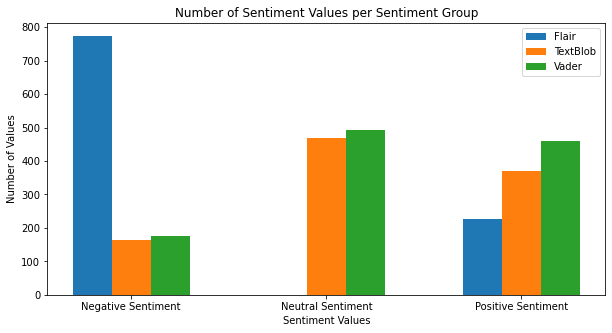

In [38]:
# Plot above values side by side in bar chart
X = ['Negative Sentiment','Neutral Sentiment','Positive Sentiment']
Flair = [test_df.loc[test_df.sentiment_score<0].shape[0],test_df.loc[test_df.sentiment_score==0].shape[0],
        test_df.loc[test_df.sentiment_score>0].shape[0]]
Textblob = [test_tb_df.loc[test_tb_df.polarity<0].shape[0],test_tb_df.loc[test_tb_df.polarity==0].shape[0],
            test_tb_df.loc[test_tb_df.polarity>0].shape[0]]
Vader = [test_vader_df.loc[test_vader_df.compound<0].shape[0],test_vader_df.loc[test_vader_df.compound==0].shape[0],
        test_vader_df.loc[test_vader_df.compound>0].shape[0]]
  
X_axis = np.arange(len(X))
plt.rcParams["figure.figsize"] = (10, 5)  
plt.bar(X_axis - 0.2, Flair, 0.2, label = 'Flair')
plt.bar(X_axis, Textblob, 0.2, label = 'TextBlob')
plt.bar(X_axis + 0.2, Vader, 0.2, label = 'Vader')
plt.xticks(X_axis, X)
plt.xlabel("Sentiment Values")
plt.ylabel("Number of Values")
plt.title("Number of Sentiment Values per Sentiment Group")
plt.legend()
